In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
print(recent_grads.describe())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In [3]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print(raw_data_count)
print(cleaned_data_count)

173
172


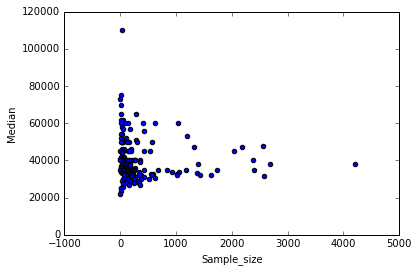

In [4]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

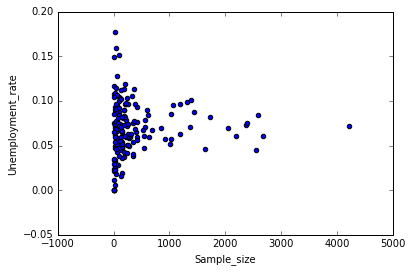

In [5]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

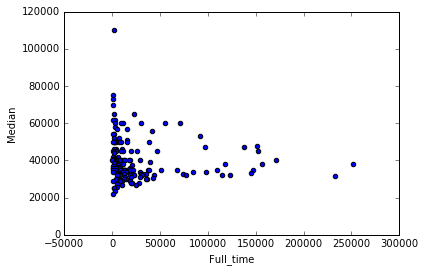

In [6]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

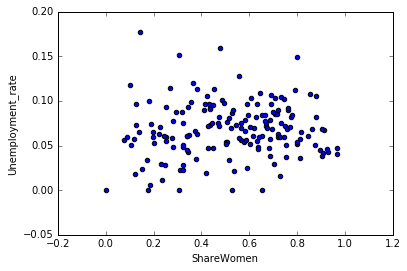

In [7]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

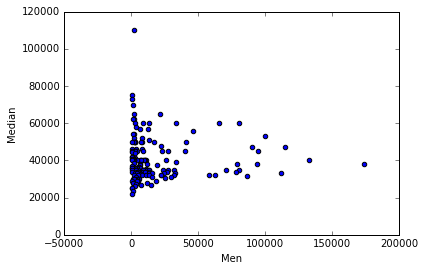

In [8]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

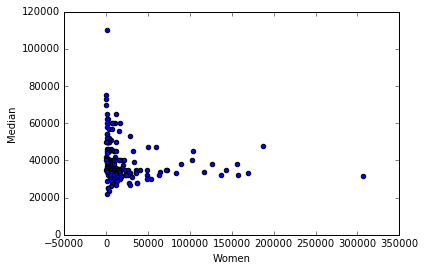

In [9]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

Students in more popular majors do not necessarily make more money. The scatter plot that correlates sample size and median of earnings shows that there's no positive correlation.
Students in courses that had more women didn't make more money, as there's no correlation between the median salary and total women in majors.
Once again, there's no correlation between the median salary and full-time employees per major.

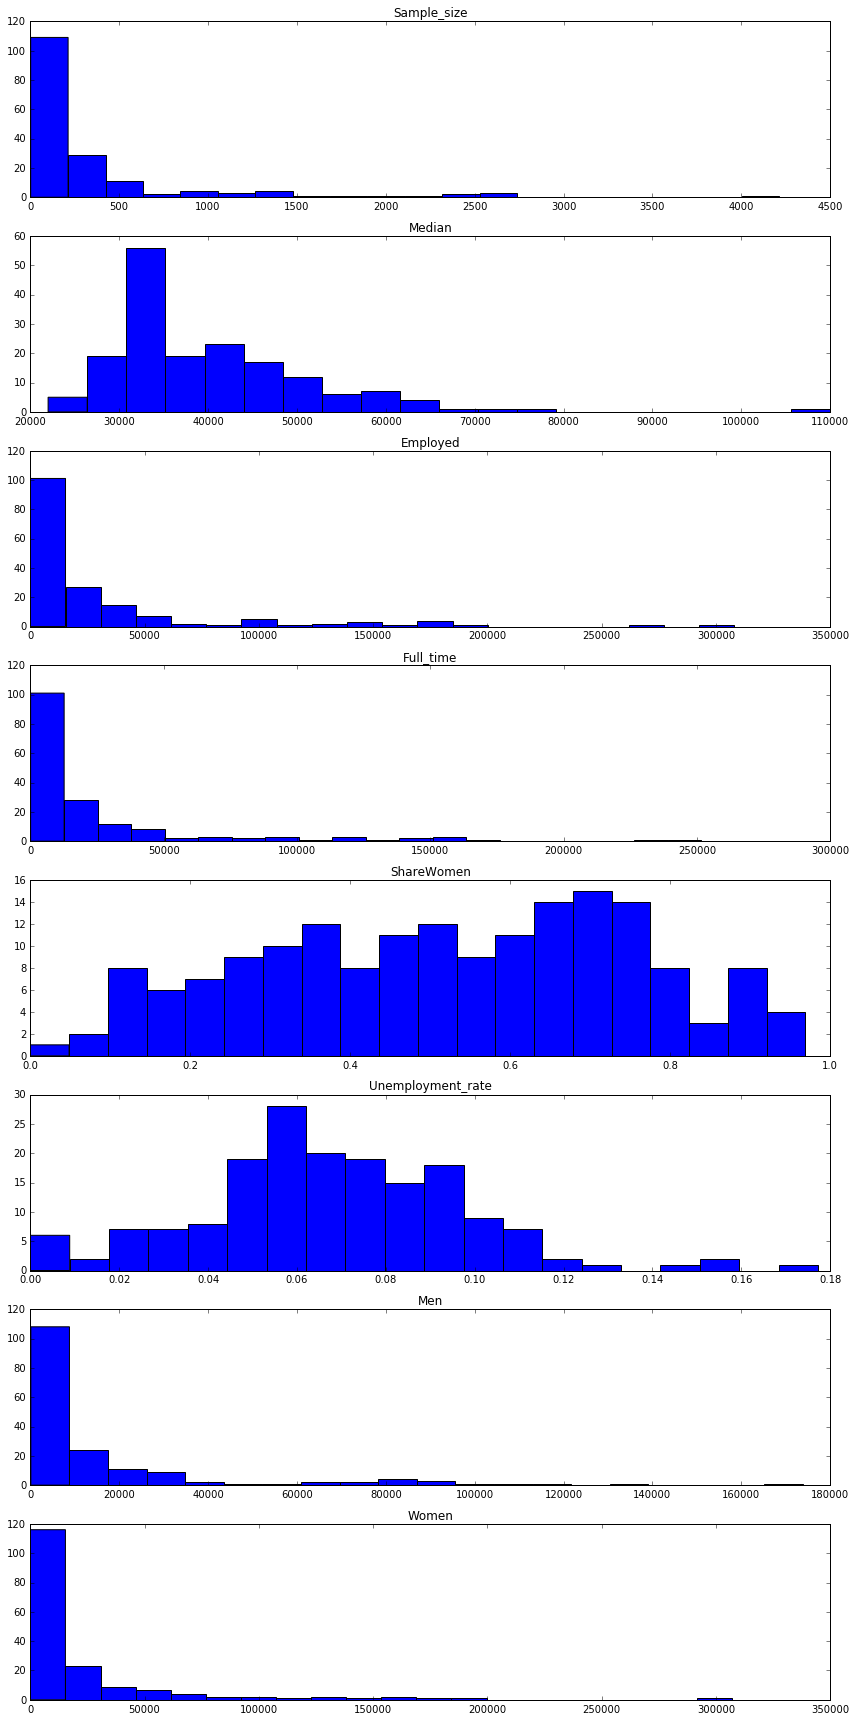

In [33]:
columns = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']

fig = plt.figure(figsize=(12,24))

for i in range(1, len(columns)+1):
    ax = fig.add_subplot(len(columns),1,i)
    ax.hist(recent_grads[columns[i-1]], bins=20)
    ax.set_title(columns[i-1])
    
fig.tight_layout() 
plt.show()

There is no clear predominance of male opposed to female majors. But if needed, one could say that there are more majors predominantly female than male. The 'ShareWomen' count of bins above 0.5 seem higher than that below 0.5.
The most common median salary range is clearly between 30k and 35k.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fe789b908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0fe79df550>]], dtype=object)

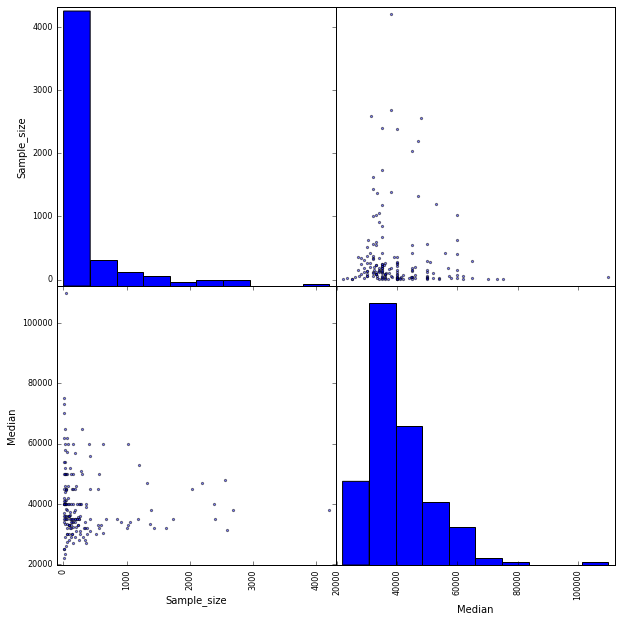

In [34]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f102c851198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0fe5ce5dd8>]], dtype=object)

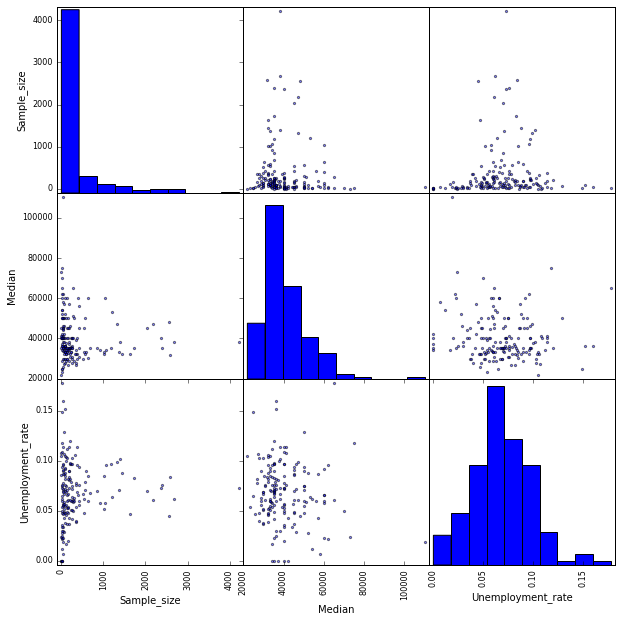

In [35]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

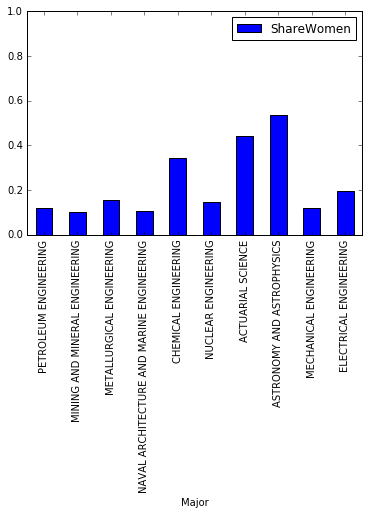

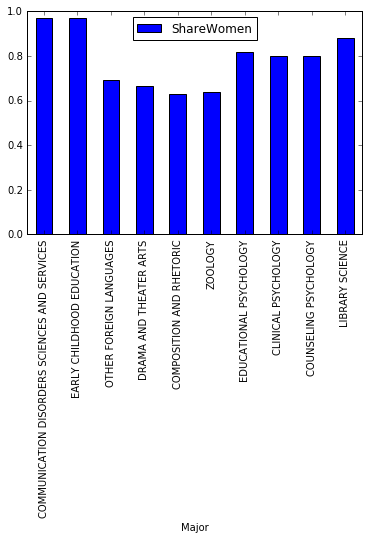

In [71]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', ylim=(0,1.0))
recent_grads[recent_grads.shape[0]-10:].plot.bar(x='Major', y='ShareWomen', ylim=(0,1.0))

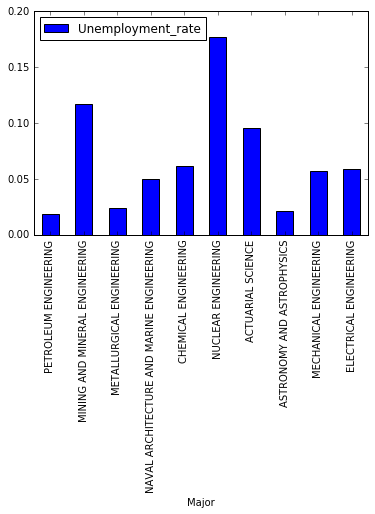

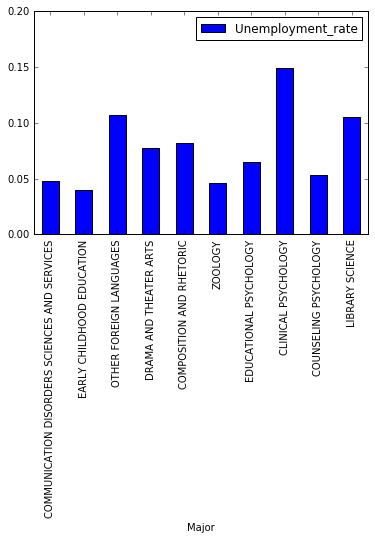

In [44]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', ylim=(0,0.2))
recent_grads[recent_grads.shape[0]-10:].plot.bar(x='Major', y='Unemployment_rate', ylim=(0,0.2))

From the first plot we're able to verify that there's a huge discrepancy between the share of women on high-paid jobs, opposed to the share on low-paid jobs. The share is much higher in low-paid ones.

In [104]:
# recent_grads['Major_category'].value_counts()
cols = ['Men', 'Women']
mj_c = recent_grads.groupby('Major_category')
type(mj_c)
# recent_grads.plot.bar(x='Major_category', y=cols)

pandas.core.groupby.DataFrameGroupBy